In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("Placement_Data_Full_Class_copy.csv")
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


# Check for missing values and duplicates 

In [3]:

print(df.isnull().sum())
print(df.duplicated().sum())

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64
0


# Convert categorical variables into numerical using one-hot encoding

In [4]:

df = pd.get_dummies(df, 
                    columns=['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 
                             'undergrad_degree', 'work_experience', 'specialisation', 'status'], 
                    drop_first=True)

# Convert only boolean columns to integers
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)


In [5]:
df

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,1,1,1,0,0,0,0,0,1
211,58.00,60.00,72.00,74.0,53.62,1,1,1,0,1,0,1,0,0,1
212,67.00,67.00,73.00,59.0,69.72,1,1,1,1,0,0,0,1,0,1
213,74.00,66.00,58.00,70.0,60.23,0,1,1,1,0,0,0,0,1,1


# Define features and target variable

In [6]:
X = df.drop(['status_Placed'],axis=1)
y = df['status_Placed']
print(X.shape,'\n\n',y.shape)


(215, 14) 

 (215,)


# Split the dataset into training and testing sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale the features

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#1 Preprocessing Step
df.shape

(215, 15)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ssc_percentage             215 non-null    float64
 1   hsc_percentage             215 non-null    float64
 2   degree_percentage          215 non-null    float64
 3   emp_test_percentage        215 non-null    float64
 4   mba_percent                215 non-null    float64
 5   gender_M                   215 non-null    int64  
 6   ssc_board_Others           215 non-null    int64  
 7   hsc_board_Others           215 non-null    int64  
 8   hsc_subject_Commerce       215 non-null    int64  
 9   hsc_subject_Science        215 non-null    int64  
 10  undergrad_degree_Others    215 non-null    int64  
 11  undergrad_degree_Sci&Tech  215 non-null    int64  
 12  work_experience_Yes        215 non-null    int64  
 13  specialisation_Mkt&HR      215 non-null    int64  

In [11]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR,status_Placed
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,0.646512,0.460465,0.609302,0.525581,0.423256,0.051163,0.274419,0.344186,0.441860,0.688372
std,10.827205,10.897509,7.358743,13.275956,5.833385,0.479168,0.499598,0.489045,0.500510,0.495228,0.220844,0.447262,0.476211,0.497767,0.464240
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# List of models to train

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# EDA  Explorately Data Analysis

In [13]:
# relationship
# corr = df.corr()
# corr
# Select only numeric columns for correlation computation
numeric_columns = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_columns.corr()
corr

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR,status_Placed
ssc_percentage,1.000000,0.511472,0.538404,0.261993,0.388478,-0.068969,0.116194,0.066996,-0.101323,0.189847,-0.066127,0.221235,0.175675,-0.172536,0.607889
hsc_percentage,0.511472,1.000000,0.434206,0.245113,0.354823,-0.021334,-0.137013,-0.019548,0.258093,-0.226675,-0.131382,-0.053599,0.141025,-0.241630,0.491228
degree_percentage,0.538404,0.434206,1.000000,0.224470,0.402364,-0.173217,0.038070,0.067229,-0.022724,0.092006,-0.180408,0.123477,0.122648,-0.218286,0.479861
emp_test_percentage,0.261993,0.245113,0.224470,1.000000,0.218055,0.084294,-0.018991,0.039108,-0.021732,0.055352,0.006907,0.009748,0.056735,-0.236315,0.127639
mba_percent,0.388478,0.354823,0.402364,0.218055,1.000000,-0.300531,0.083120,0.090201,-0.049415,0.048050,-0.036055,0.125009,0.168811,-0.105728,0.076922
gender_M,-0.068969,-0.021334,-0.173217,0.084294,-0.300531,1.000000,0.019429,0.065945,-0.001087,0.042682,-0.093246,0.084072,0.085153,-0.106160,0.090670
ssc_board_Others,0.116194,-0.137013,0.038070,-0.018991,0.083120,0.019429,1.000000,0.605883,-0.056671,0.058505,-0.002758,0.101060,-0.040744,-0.051565,0.037297
hsc_board_Others,0.066996,-0.019548,0.067229,0.039108,0.090201,0.065945,0.605883,1.000000,-0.073522,0.126446,-0.116920,0.086548,0.038357,0.002232,0.016945
hsc_subject_Commerce,-0.101323,0.258093,-0.022724,-0.021732,-0.049415,-0.001087,-0.056671,-0.073522,1.000000,-0.901673,-0.202135,-0.584673,-0.056719,-0.129985,0.024414
hsc_subject_Science,0.189847,-0.226675,0.092006,0.055352,0.048050,0.042682,0.058505,0.126446,-0.901673,1.000000,0.057432,0.654593,0.033270,0.166639,0.007279


In [14]:
df.select_dtypes(include=['number']).count

<bound method DataFrame.count of      ssc_percentage  hsc_percentage  degree_percentage  emp_test_percentage  \
0             67.00           91.00              58.00                 55.0   
1             79.33           78.33              77.48                 86.5   
2             65.00           68.00              64.00                 75.0   
3             56.00           52.00              52.00                 66.0   
4             85.80           73.60              73.30                 96.8   
..              ...             ...                ...                  ...   
210           80.60           82.00              77.60                 91.0   
211           58.00           60.00              72.00                 74.0   
212           67.00           67.00              73.00                 59.0   
213           74.00           66.00              58.00                 70.0   
214           62.00           58.00              53.00                 89.0   

     mba_percent  

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

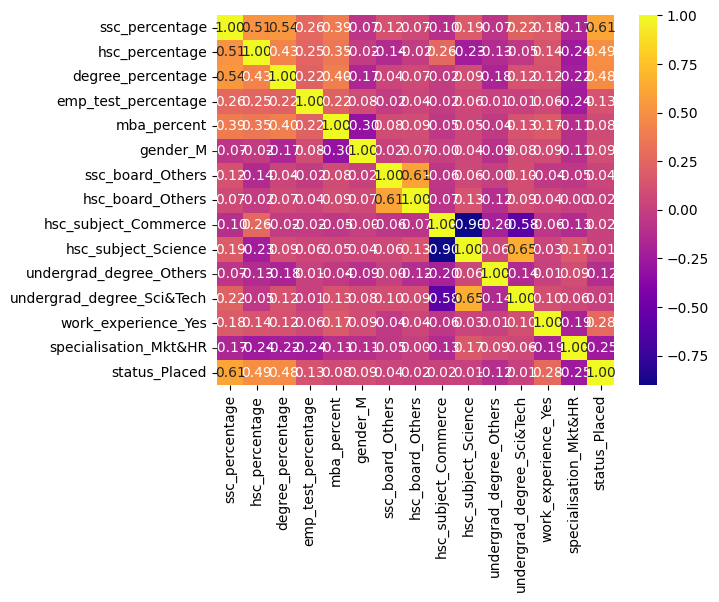

In [16]:
sns.heatmap(corr,cmap='plasma',annot=True,fmt=".2f")

In [17]:
# df['ssc_percentage']

# Plot a histogram of the ssc_percentage column


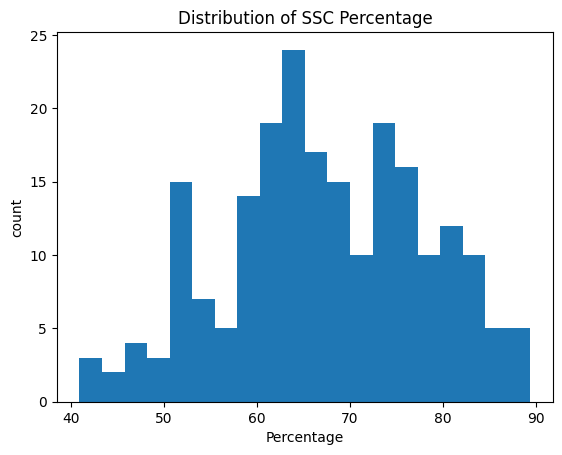

In [18]:
plt.hist(df['ssc_percentage'],bins=20)
plt.title("Distribution of SSC Percentage")
plt.xlabel('Percentage')
plt.ylabel('count')
plt.show()

# Plot a histogram of the hsc_percentage column


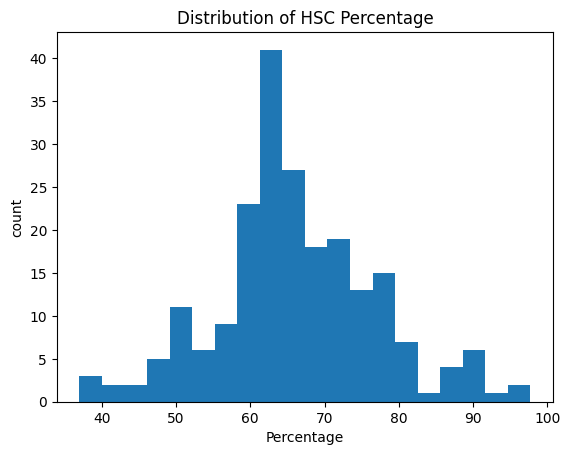

In [19]:
plt.hist(df['hsc_percentage'],bins=20)
plt.title("Distribution of HSC Percentage")
plt.xlabel('Percentage')
plt.ylabel('count')
plt.show()

# Plot a histogram of the gender column


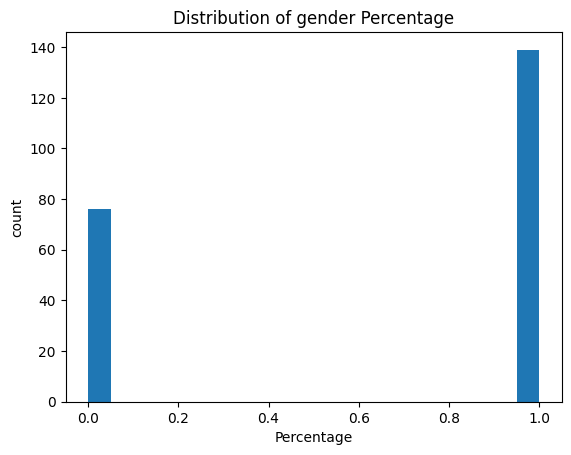

In [20]:

plt.hist(df['gender_M'],bins=20)
plt.title("Distribution of gender Percentage")
plt.xlabel('Percentage')
plt.ylabel('count')
plt.show()


In [21]:
df

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,1,1,1,0,0,0,0,0,1
211,58.00,60.00,72.00,74.0,53.62,1,1,1,0,1,0,1,0,0,1
212,67.00,67.00,73.00,59.0,69.72,1,1,1,1,0,0,0,1,0,1
213,74.00,66.00,58.00,70.0,60.23,0,1,1,1,0,0,0,0,1,1


# Plot a scatterplot of ssc_percentage vs. hsc_percentage

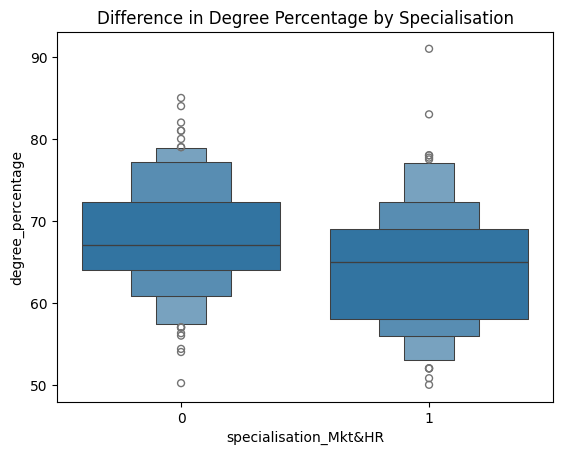

In [22]:
sns.boxenplot(x='specialisation_Mkt&HR',y='degree_percentage',data=df)
plt.title('Difference in Degree Percentage by Specialisation')
plt.show()

In [23]:
df['status_Placed']

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status_Placed, Length: 215, dtype: int64

# Plot a scatterplot of ssc_percentage vs. hsc_percentage


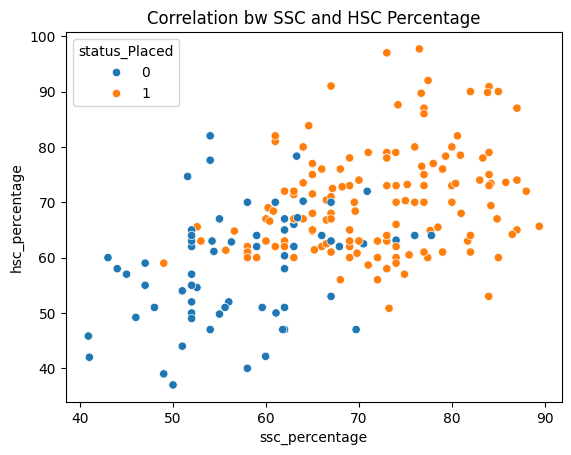

In [24]:
sns.scatterplot(x='ssc_percentage',y='hsc_percentage',data=df,hue='status_Placed')
plt.title("Correlation bw SSC and HSC Percentage")
plt.show()

In [25]:
df['status_Placed'].value_counts()

status_Placed
1    148
0     67
Name: count, dtype: int64

# Train and evaluate each model

Results for Logistic Regression:
Accuracy: 0.813953488372093
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.82      0.93      0.88        30

    accuracy                           0.81        43
   macro avg       0.80      0.74      0.76        43
weighted avg       0.81      0.81      0.80        43



<Figure size 100x150 with 0 Axes>

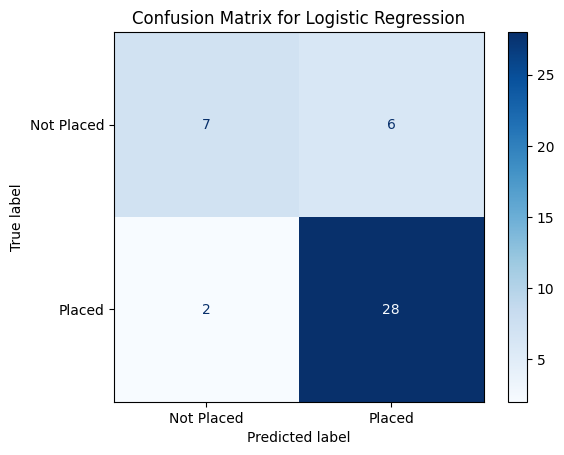

--------------------------------------------------------------------------------

Results for Decision Tree:
Accuracy: 0.7906976744186046
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.85      0.71        13
           1       0.92      0.77      0.84        30

    accuracy                           0.79        43
   macro avg       0.77      0.81      0.77        43
weighted avg       0.83      0.79      0.80        43



<Figure size 100x150 with 0 Axes>

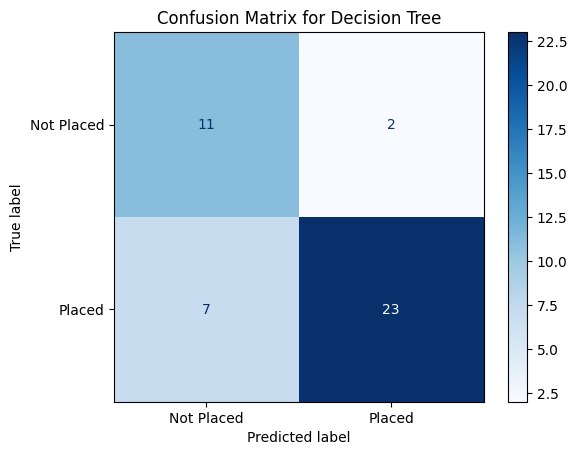

--------------------------------------------------------------------------------

Results for Random Forest:
Accuracy: 0.8372093023255814
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.85      0.93      0.89        30

    accuracy                           0.84        43
   macro avg       0.82      0.77      0.79        43
weighted avg       0.83      0.84      0.83        43



<Figure size 100x150 with 0 Axes>

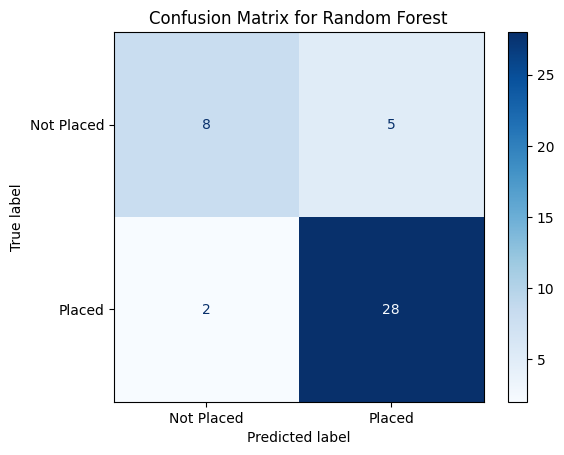

--------------------------------------------------------------------------------

Results for Support Vector Machine:
Accuracy: 0.7906976744186046
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.46      0.57        13
           1       0.80      0.93      0.86        30

    accuracy                           0.79        43
   macro avg       0.78      0.70      0.72        43
weighted avg       0.78      0.79      0.77        43



<Figure size 100x150 with 0 Axes>

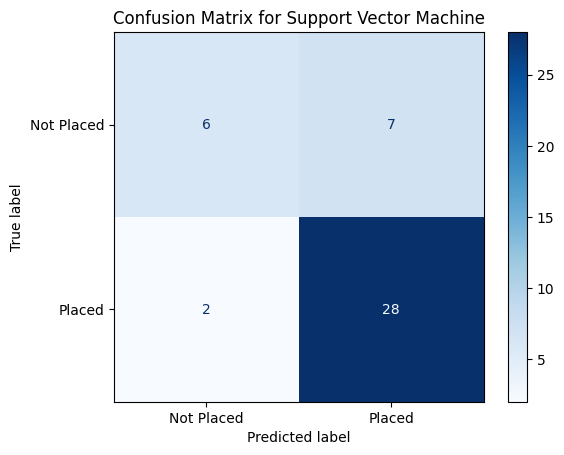

--------------------------------------------------------------------------------

Results for K-Nearest Neighbors:
Accuracy: 0.7209302325581395
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.38      0.45        13
           1       0.76      0.87      0.81        30

    accuracy                           0.72        43
   macro avg       0.66      0.63      0.63        43
weighted avg       0.70      0.72      0.70        43



<Figure size 100x150 with 0 Axes>

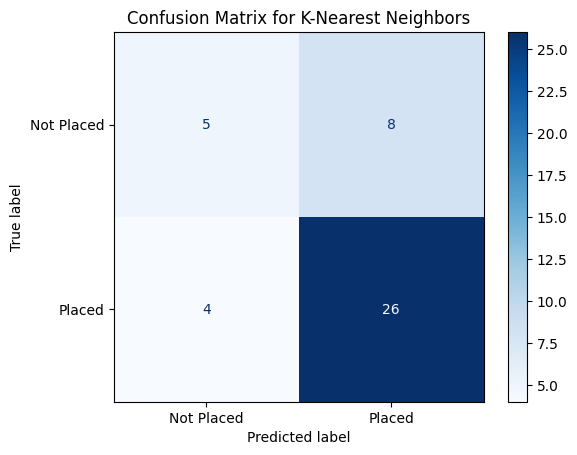

--------------------------------------------------------------------------------



In [33]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# Iterate through all the models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Print the results
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # print(f"Confusion Matrix:\n{cm}\n")
    
    # Display confusion matrix using a heatmap for better visualization
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Placed', 'Placed'])
    
    # Adjust the figure size to make it smaller
    plt.figure(figsize=(1, 1.5))  # Smaller size, change these values for different sizes
    cm_display.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
    print("--------------------------------------------------------------------------------\n")

# Choosing the highest accurate model.

In [30]:


rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8604651162790697


# Predict on New Data

In [31]:
# Example input data (make sure this matches the order and format of X)
# input_data = (65.00, 68.00, 64.00, 75.0, 57.80, 1, 0, 0, 1, 0, 1, 0, 0, 1)
input_data = (62.00,58.00,53.00,89.0,60.22,1,0,1,0,1,0,0,0,1)


# Convert the input data to a numpy array and reshape it for prediction
input_data = np.array(input_data).reshape(1, -1)
input_data = scaler.transform(input_data)  # Apply scaling

y_pred = rfc.predict(input_data)

if y_pred[0] == 1:
    print("This person is placed for the job.")
else:
    print("This person is not placed for the job")

This person is not placed for the job


C:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Visualize the Decision Tree

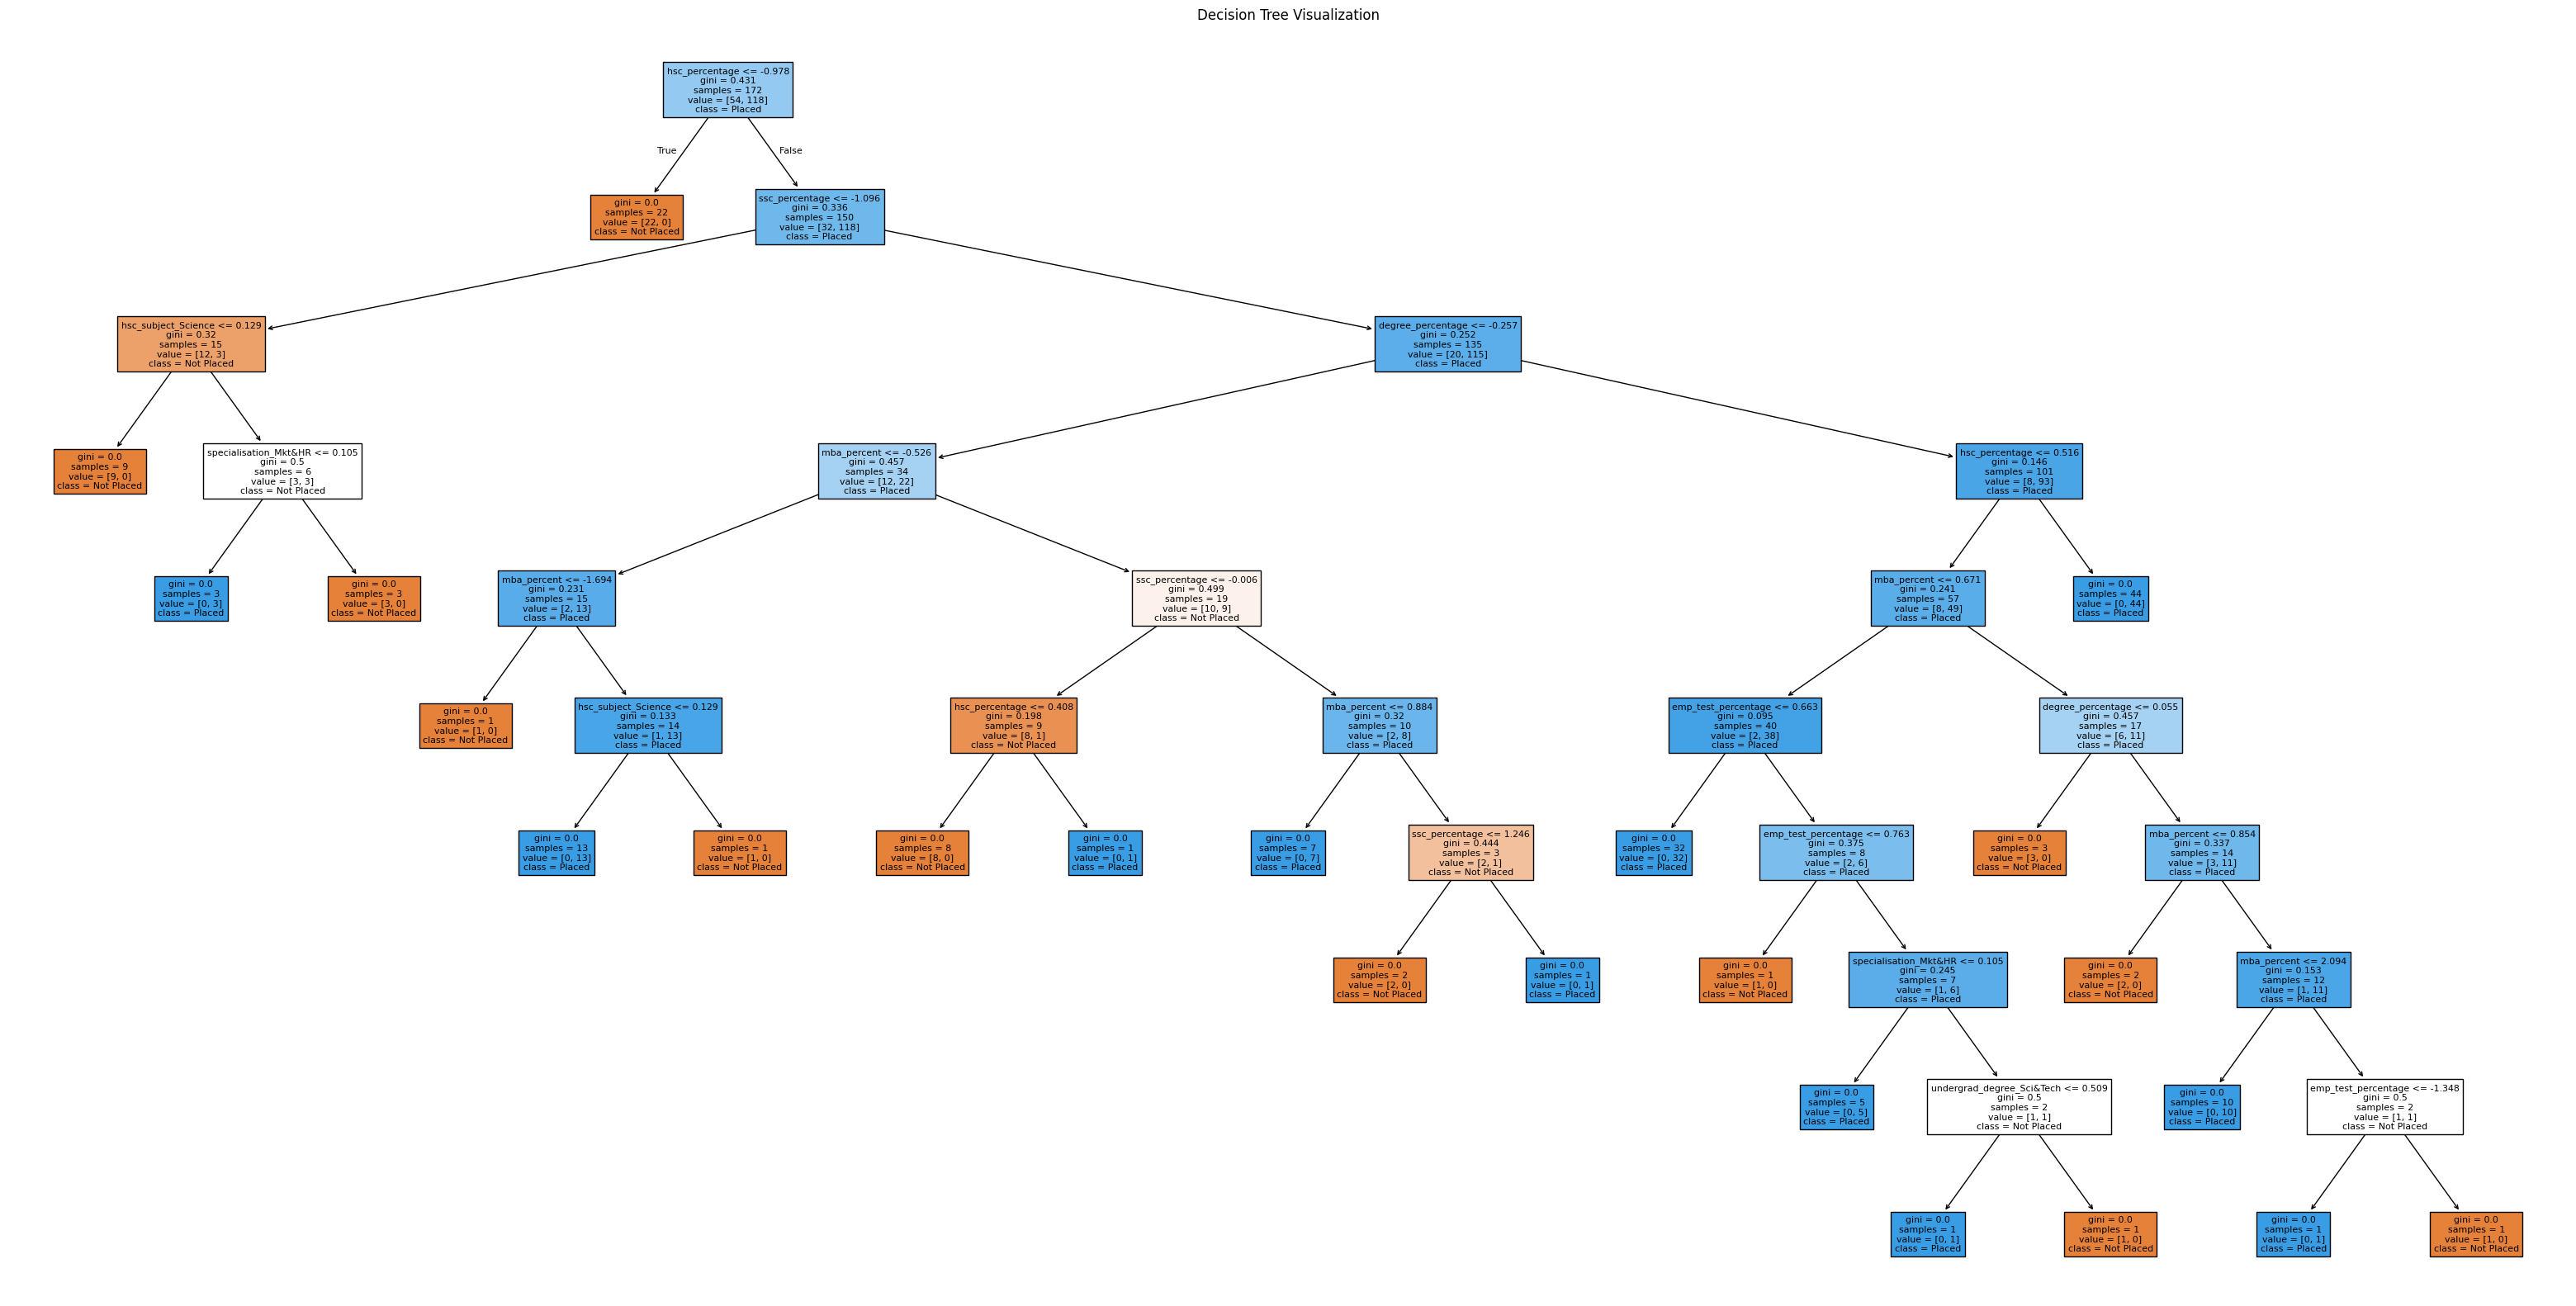

In [32]:
# Fit the Decision Tree model again for visualization
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(40,20))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Placed', 'Placed'])
plt.title('Decision Tree Visualization')
plt.show()



# Extract Decision Rules from the Decision Tree

In [33]:
# Extract decision rules
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print(tree_rules)


|--- hsc_percentage <= -0.98
|   |--- class: 0
|--- hsc_percentage >  -0.98
|   |--- ssc_percentage <= -1.10
|   |   |--- hsc_subject_Science <= 0.13
|   |   |   |--- class: 0
|   |   |--- hsc_subject_Science >  0.13
|   |   |   |--- specialisation_Mkt&HR <= 0.11
|   |   |   |   |--- class: 1
|   |   |   |--- specialisation_Mkt&HR >  0.11
|   |   |   |   |--- class: 0
|   |--- ssc_percentage >  -1.10
|   |   |--- degree_percentage <= -0.26
|   |   |   |--- mba_percent <= -0.53
|   |   |   |   |--- mba_percent <= -1.69
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- mba_percent >  -1.69
|   |   |   |   |   |--- hsc_subject_Science <= 0.13
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- hsc_subject_Science >  0.13
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- mba_percent >  -0.53
|   |   |   |   |--- ssc_percentage <= -0.01
|   |   |   |   |   |--- hsc_percentage <= 0.41
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- hsc_percentage >  0.41
|